# Midterm Project

The midterm project is designed to let you apply what you have learned so far, and demonstrate that you have mastered it. The submission will be graded on the correctness of the execution of your analysis (50%), the ambitiousness of the problems chosen (30%), and the creativity of your questions and solutions (20%).

Please note that the project is *individual*, and the solutions will be checked for substantial overlap. However, you should feel free to discuss problems and ideas with your class mates, just do not share code.

Your submission should include all outputs and be self-contained, so it can be executed if necessary.


## Submission
The project is due on March 29, 23:59 CET. Late submissions will not be considered, and graded as 0. To submit, please:

1. rename this file with your student ID
2. copy this file and all additional data into a folder with your student ID
3. zip the folder
4. upload to Blackboard and send a copy or link to a copy of the zip file to Tommaso Fornaciari <fornaciari@unibocconi.it>

## 1. Data and Preprocessing (5 pts)

Pick a data set, either from the ones we have used in class, or one that you have found yourself (up to 2 bonus points, depending on size and complexity).
Briefly (max. 100 words!) describe the content and type of the data set (book, reviews, Twitter, ...). 

Preprocess the data and explain (max. 200 words) which preprocessing steps you chose and why, and give statistics of the number of documents, types, and tokens, before and after preprocessing.

### Content Description 
I selected the text files - the Negro in the South (Massachusets 1907), by W. E. DuBois and Booker T. Washington, The Narrative of the Life of Frederick Douglass (Baltimore 1845), by Frederick Douglass, and The Future of the American Negro (Alabama 1899), by Booker T. Washington - from the Gutenburg Project. The three books chosen are famous accounts and anecdots of African American writers in the mid to late 1800s. I will perform sentiment analysis on the large texts to understand better the writing styles of such specific authors. Furthermore I will utilize language modeling to develope recognize the most important words in each document.

In [1]:
# Import Proper Libraries for Preprocessing

import spacy
import en_core_web_sm
nlp = spacy.load('en')
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
from nltk import SnowballStemmer
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garde\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
# Importing Text Files

Washington = r"C:\Users\garde\Downloads\Washington.txt"
Douglass = r"C:\Users\garde\Downloads\Douglass.txt"
DuBois = r"C:\Users\garde\Downloads\DuBois.txt"
Fulltext = r"C:\Users\garde\Downloads\Full_Text.txt"

washingtontext  = [line.strip() for line in open(Washington, encoding='utf8').readlines()]
douglasstext = [line.strip() for line in open(Douglass, encoding='utf8').readlines()]
duboistext = [line.strip() for line in open(DuBois, encoding='utf8').readlines()]
fulltext = [line.strip() for line in open(Fulltext, encoding="ISO-8859-1").readlines()]

In [20]:
# Text cutting out the Gutenburg intros

washingtontext = washingtontext[70:]

douglasstext = douglasstext[100:]

duboistext = duboistext[86:]

In [21]:
# Number of sentences (Documents)

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1

print("the Negro in the South has " + str(file_len(DuBois))  + " sentences")
print("The Narrative of the Life of Frederick Douglass has " + str(file_len(Douglass)) + " sentences")
print("The Future of the American Negro has " + str(file_len(Washington)) + " sentences")
print("Total sentence count: " + str(file_len(Fulltext)))

the Negro in the South has 3613 sentences
The Narrative of the Life of Frederick Douglass has 3737 sentences
The Future of the American Negro has 3760 sentences
Total sentence count: 10879


In [22]:
# Token count with nltk

def word_len(fname):
    with open(fname) as f:
        lines_in_file = f.read()
        nltk_tokens = nltk.word_tokenize(lines_in_file)
    return str(len(nltk_tokens))
    
print("The Negro in the South has " + str(word_len(DuBois))  + " words")
print("The Narrative of the Life of Frederick Douglass has " + str(word_len(Douglass)) + " words")
print("The Future of the American Negro has " + str(word_len(Washington)) + " words")
print("the compiled books have " + str(word_len(Fulltext)) + " words")

The Negro in the South has 37158 words
The Narrative of the Life of Frederick Douglass has 47693 words
The Future of the American Negro has 43270 words
the compiled books have 127291 words


### Preprocessing

Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation.
Words that have fewer than 3 characters are removed.

All stopwords are removed.

Words are lemmatized - words in third person are changed to first person and verbs in past and future tenses are changed into present.

Words are stemmed - words are reduced to their root form.

In [23]:
# Removing all punctuation

washingtontext = [''.join(c for c in s if c not in string.punctuation) for s in washingtontext]
washingtontext = [s for s in washingtontext if s]

douglasstext = [''.join(c for c in s if c not in string.punctuation) for s in douglasstext]
douglasstext = [s for s in douglasstext if s]

duboistext = [''.join(c for c in s if c not in string.punctuation) for s in duboistext]
duboistext = [s for s in duboistext if s]

fulltext = [''.join(c for c in s if c not in string.punctuation) for s in fulltext]
fulltext = [s for s in fulltext if s]

In [24]:
# Tokenization 

washingtontokens = [[token.text for token in nlp(sentence)] for sentence in washingtontext]
douglasstokens = [[token.text for token in nlp(sentence)] for sentence in douglasstext]
duboistokens = [[token.text for token in nlp(sentence)] for sentence in duboistext]
fulltokens = [[token.text for token in nlp(sentence)] for sentence in fulltext]

print(fulltokens[:10])

[['PREFACE'], ['LETTER', 'FROM', 'WENDELL', 'PHILLIPS', 'ESQ'], ['FREDERICK', 'DOUGLASS'], ['CHAPTER', 'I'], ['CHAPTER', 'II'], ['CHAPTER', 'III'], ['CHAPTER', 'IV'], ['CHAPTER', 'V'], ['CHAPTER', 'VI'], ['CHAPTER', 'VII']]


In [25]:
# Most Frequent Tokens 

a = Counter([token for sentence in washingtontokens for token in sentence])
b = Counter([token for sentence in duboistokens for token in sentence])
c = Counter([token for sentence in douglasstokens for token in sentence])

print("most common tokens in The Future of the American Negro: " + str(a.most_common(10)))
print()
print("most common tokens in the Negro in the South: " + str(b.most_common(10)))
print()
print("most common tokens in The Narrative of the Life of Frederick Douglass: " + str(c.most_common(10)))

most common tokens in The Future of the American Negro: [('the', 2925), ('of', 1592), ('and', 1224), ('to', 1134), ('in', 1082), ('a', 799), ('that', 695), ('is', 598), ('for', 361), ('I', 335)]

most common tokens in the Negro in the South: [('the', 2363), ('of', 1501), ('and', 1137), ('to', 860), ('in', 835), ('a', 609), ('that', 426), ('was', 339), ('is', 325), ('not', 231)]

most common tokens in The Narrative of the Life of Frederick Douglass: [('the', 2074), ('of', 1531), ('to', 1465), ('and', 1325), ('I', 1028), ('a', 815), ('was', 738), ('in', 673), ('my', 405), ('that', 400)]


In [26]:
# Removing stop words

washingtoncomment_words = [[token.lemma_ if token.lemma_ != '-PRON-' else token.lower_ for token in nlp(sentence) if token.pos_ in {'NOUN','VERB',"ADJ","PROPN"}] for sentence in washingtontext]
douglasscomment_words = [[token.lemma_ if token.lemma_ != '-PRON-' else token.lower_ for token in nlp(sentence) if token.pos_ in {'NOUN','VERB',"ADJ","PROPN"}] for sentence in douglasstext]
duboiscomment_words = [[token.lemma_ if token.lemma_ != '-PRON-' else token.lower_ for token in nlp(sentence) if token.pos_ in {'NOUN','VERB',"ADJ","PROPN"}] for sentence in duboistext]
fulltextcomment_words = [[token.lemma_ if token.lemma_ != '-PRON-' else token.lower_ for token in nlp(sentence) if token.pos_ in {'NOUN','VERB',"ADJ","PROPN"}] for sentence in fulltext]

print(fulltextcomment_words[:25])

[['preface'], ['letter', 'wendell', 'phillips', 'esq'], ['frederick', 'douglass'], ['chapter'], ['chapter'], ['chapter'], ['chapter', 'iv'], ['chapter', 'v'], ['chapter', 'vi'], ['chapter', 'vii'], ['chapter', 'viii'], ['chapter', 'ix'], ['chapter', 'x'], ['chapter', 'xi'], ['appendix'], ['parody'], ['preface'], ['month', 'august', 'attend', 'antislavery', 'convention'], ['nantucket', 'which', 'be', 'my', 'happiness', 'become', 'acquaint'], ['frederick', 'douglass', 'writer', 'follow', 'narrative', 'be'], ['strange', 'member', 'body', 'have', 'make'], ['his', 'escape', 'southern', 'prisonhouse', 'bondage', 'feeling'], ['his', 'curiosity', 'excite', 'ascertain', 'principle', 'measure'], ['whom', 'have', 'hear', 'vague', 'description'], ['be', 'slavehe', 'be', 'induce', 'give', 'his', 'attendance', 'occasion']]


In [27]:
# Most Frequent Tokens after lemmatization

a2 = Counter([token for sentence in washingtoncomment_words for token in sentence])
b2 = Counter([token for sentence in duboiscomment_words for token in sentence])
c2 = Counter([token for sentence in douglasscomment_words for token in sentence])

print("most common tokens in The Future of the American Negro: " + str(a2.most_common(10)))
print()
print("most common tokens in the Negro in the South: " + str(b2.most_common(10)))
print()
print("most common tokens in The Narrative of the Life of Frederick Douglass: " + str(c2.most_common(10)))

most common tokens in The Future of the American Negro: [('be', 1550), ('have', 630), ('negro', 321), ('man', 281), ('his', 256), ('race', 230), ('south', 223), ('white', 220), ('will', 204), ('that', 178)]

most common tokens in the Negro in the South: [('be', 1294), ('have', 420), ('negro', 224), ('his', 203), ('south', 163), ('man', 163), ('their', 152), ('white', 128), ('which', 125), ('slave', 114)]

most common tokens in The Narrative of the Life of Frederick Douglass: [('be', 1616), ('have', 478), ('my', 456), ('his', 388), ('slave', 258), ('do', 209), ('which', 183), ('would', 181), ('mr', 177), ('master', 162)]


In [28]:
#Stemming to further reduce word variation

stemmer = SnowballStemmer('english')
washingtonstems = [[stemmer.stem(token) for token in sentence] for sentence in washingtoncomment_words]
douglassstems = [[stemmer.stem(token) for token in sentence] for sentence in douglasscomment_words]
duboisstems = [[stemmer.stem(token) for token in sentence] for sentence in duboiscomment_words]
fulltextstems = [[stemmer.stem(token) for token in sentence] for sentence in fulltextcomment_words]


print(washingtonstems[:25])

[['prefac'], ['give', 'volum', 'public', 'deem', 'fair', 'say'], ['have', 'yield', 'oftrep', 'request', 'that', 'put', 'more'], ['definit', 'perman', 'form', 'idea', 'regard', 'negro', 'his'], ['futur', 'which', 'have', 'express', 'mani', 'time', 'public', 'platform'], ['public', 'press', 'magazin'], ['make', 'grate', 'acknowledg', 'atlant', 'month'], ['appleton', 'popular', 'scienc', 'month', 'their', 'kind', 'grant'], ['permiss', 'use', 'part', 'articl', 'which', 'have'], ['various', 'time', 'contribut', 'their', 'column'], ['booker', 't', 'washington'], ['tuskege', 'normal', 'industri', 'institut'], ['tuskege', 'ala', 'octob'], ['content'], ['chapter', 'page'], ['first', 'appear', 'negro', 'americarapid'], ['increasecondit', 'civil', 'wardur', 'reconstruct'], ['chapter', 'ii', 'page'], ['respons', 'whole', 'countri', 'negroprogress'], ['pastsam', 'method', 'educ', 'do', 'fit', 'casesprov'], ['case', 'southern', 'negroillustrationslack'], ['moneycomparison', 'outlay', 'school', 'nort

In [29]:
# Number of tokens after preprocessing 

print("The Negro in the South has " + str(sum(map(len,duboisstems))) + " words after preprocessing")
print("The Narrative of the Life of Frederick Douglass has " + str(sum(map(len,douglassstems))) + " words after preprocessing")
print("The Future of the American Negro has " + str(sum(map(len,washingtonstems))) + " words after preprocessing")
print("The three documents have " + str(sum(map(len,fulltextstems))) + " words after preprocessing")

The Negro in the South has 17409 words after preprocessing
The Narrative of the Life of Frederick Douglass has 21295 words after preprocessing
The Future of the American Negro has 20520 words after preprocessing
The three documents have 59242 words after preprocessing


### Preprocessing Documentation

Before we did anything with the three documents, the most common tokens were the expected punctuations and function words. From here we removed all punctuation and stop words and kept only the content words. Futhermore, we took the stems of each of the three books and ran another count of the tokens for each document, ending with 50% less words. I chose to perform lemmazitation with POS to extract the stop words and unnecesary language, and stemming was used to reduce variation among all three books. I intend to run analysis on the three books individually and analysis on a corpus of the three boosk combined so it was important to run the preprocssing on all documents individually.

## 2. Analysis (16 pts)

Describe what you are investigating with the data (max. 100 words, 3 pts), and apply at least one version of *each* of the following analysis methods to the data set (justify your choices):
1. TFIDF analysis of important terms **or** latent topics from matrix factorization (2 pts)
2. Topic modeling with LDA (4 pts)
3. Dense word or document embeddings (4 pts)
4. Clustering (3 pts)

If appropriate for your probelm, feel free to explore other methods we discussed (NER, parsing, POS, etc.), or algorithms not covered in class (e.g., clustering algorithms, etc.), as long as they do not require additional libraries (up to 2 bonus points).

### Investigation Description 
I want to understand the differences and similarities between the three seminal books written by free and former slave authors in the late 1800s and early 1900s. With the data on hand I want to discover the overall sentiment analysis of the genre and time period as well as use topic modelling to see how the region and time period of each author affects their writing styles. Slavery and historical racism shaped these authors and I want to know how their writing evolved across the U.S. 

In [30]:
# Import Proper Libraries for Analysis 

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import LdaMulticore, TfidfModel
from gensim.corpora import Dictionary
import time 
import multiprocessing 
import re
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import TruncatedSVD
from gensim.models import Word2Vec
from gensim.models.word2vec import FAST_VERSION

### TFIDF analysis of important terms

I performed TFIDF analysis on the three books individually as well as the entire corpus of the three books combined. I wanted to see if there was large variation between the most important words for each author and book. What we see below is that the majority of the books are in fact using the same words. Negro, slave and south are consistently represented throughout all the works. 

In [31]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word', min_df=0.01, max_df=0.50, stop_words='english', sublinear_tf=True)
vectorizer = CountVectorizer(analyzer='word', min_df=0.01, max_df=0.50, stop_words='english')


In [32]:
fullvector = tfidf_vectorizer.fit_transform(fulltext)
fullvector2 = vectorizer.fit_transform(fulltext)
fullvector.shape, fullvector2.shape

((9673, 34), (9673, 34))

In [33]:
# TFIDF for entirety of texts

word_counts = fullvector2.toarray()
word_tfidf = fullvector.toarray()
word_tfidf[word_tfidf < 0.2] = 0

# Get featurenames for all words at certain times
df = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': word_counts.sum(axis=0), 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': word_tfidf.sum(axis=0)
                       })

df = df.sort_values(['tfidf', 'tf', 'idf'], ascending=False)
df.head()

,word,tf,idf,tfidf
15,negro,537,3.909997,419.983335
26,south,408,4.178261,323.377992
11,man,343,4.381139,243.047725
31,white,351,4.342386,236.143451
20,race,270,4.601248,220.129602


In [34]:
douglassvector = tfidf_vectorizer.fit_transform(douglasstext)
douglassvector2 = vectorizer.fit_transform(douglasstext)
douglassvector.shape, douglassvector2.shape

((3328, 38), (3328, 38))

In [35]:
# The Narrative of the Life of Frederick Douglass important terms

word_counts1 = douglassvector2.toarray()
word_tfidf1 = douglassvector.toarray()
word_tfidf1[word_tfidf1 < 0.2] = 0

df1 = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': word_counts1.sum(axis=0), 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': word_tfidf1.sum(axis=0)
                       })


df1 = df1.sort_values(['tfidf', 'tf', 'idf'], ascending=False)
df1.head()

,word,tf,idf,tfidf
23,mr,177,4.010561,125.734729
28,slave,135,4.242893,109.589615
30,slaves,123,4.306406,101.254932
32,time,119,4.339743,96.997681
20,master,122,4.298243,95.374171


In [36]:
duboisvector = tfidf_vectorizer.fit_transform(duboistext)
duboisvector2 = vectorizer.fit_transform(duboistext)

duboisvector.shape, duboisvector2.shape

((2979, 44), (2979, 44))

In [37]:
# the Negro in the South Important Terms

word_counts2 = duboisvector2.toarray()
word_tfidf2 = duboisvector.toarray()
word_tfidf2[word_tfidf2 < 0.2] = 0

df2 = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': word_counts2.sum(axis=0), 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': word_tfidf2.sum(axis=0)
                       })


df2 = df2.sort_values(['tfidf', 'tf', 'idf'], ascending=False)
df2.head()

,word,tf,idf,tfidf
19,negro,216,3.643092,156.741689
33,south,165,3.912082,121.258302
31,slavery,96,4.424968,75.514106
40,white,102,4.394508,70.381031
24,people,88,4.533770,69.746485


In [38]:
washingtonvector = tfidf_vectorizer.fit_transform(washingtontext)
washingtonvector2 = vectorizer.fit_transform(washingtontext)

washingtonvector.shape, washingtonvector2.shape

((3352, 43), (3352, 43))

In [39]:
# The Future of the American Negro Important Terms

word_counts3 = washingtonvector2.toarray()
word_tfidf3 = washingtonvector.toarray()
word_tfidf3[word_tfidf3 < 0.2] = 0

df3 = pd.DataFrame(data={'word': vectorizer.get_feature_names(), 
                        'tf': word_counts3.sum(axis=0), 
                        'idf': tfidf_vectorizer.idf_,
                        'tfidf': word_tfidf3.sum(axis=0)
                       })

df3 = df3.sort_values(['tfidf', 'tf', 'idf'], ascending=False)
df3.head()

,word,tf,idf,tfidf
19,negro,319,3.368218,229.409112
31,south,229,3.688265,164.303097
26,race,184,3.924654,140.552753
40,white,205,3.819293,121.679935
17,man,184,3.941461,113.560648


### Topic modeling with LDA

In [40]:
# read in instances and create Dictionary object with information about frequencies  
douglassdictionary = Dictionary(douglassstems)
duboisdictionary = Dictionary(duboisstems)
washingtondictionary = Dictionary(washingtonstems)
fulltextdictionary = Dictionary(fulltextstems)

# remove words that are too rare or too frequent
douglassdictionary.filter_extremes(no_below=30, no_above=0.1)
duboisdictionary.filter_extremes(no_below=30, no_above=0.1)
washingtondictionary.filter_extremes(no_below=30, no_above=0.1)
fulltextdictionary.filter_extremes(no_below=30, no_above=0.1)

print(douglassdictionary, flush=True)

print(duboisdictionary, flush=True)

print(washingtondictionary, flush=True)

print(fulltextdictionary, flush=True)


Dictionary(98 unique tokens: ['which', 'make', 'escap', 'feel', 'hear']...)
Dictionary(92 unique tokens: ['christian', 'find', 'mani', 'my', 'year']...)
Dictionary(117 unique tokens: ['give', 'say', 'more', 'that', 'his']...)
Dictionary(335 unique tokens: ['chapter', 'month', 'becom', 'my', 'which']...)


In [41]:
# The Future of the American Negro Topics
#replace words by their numerical IDs and their frequency
print("translating corpus to IDs for The Future of the American Negro", flush=True)
washingtonlda = [washingtondictionary.doc2bow(text) for text in washingtonstems]

# learn TFIDF values from corpus
print("tf-idf transformation", flush=True)
tfidfmodel = TfidfModel(washingtonlda)

# transform raw frequencies into TFIDF
model_corpus = tfidfmodel[washingtonlda]

# The Negro in the South Topics
print("translating corpus to IDs for The Negro in the South", flush=True)
duboislda = [duboisdictionary.doc2bow(text) for text in duboisstems]

print("tf-idf transformation", flush=True)
tfidfmodel2 = TfidfModel(duboislda)

model_corpus2 = tfidfmodel[duboislda]

# The Narrative of the Life of Frederic Douglass
print("translating corpus to IDs for The Narrative of the Life of Frederic Douglass", flush=True)
douglasslda = [douglassdictionary.doc2bow(text) for text in douglassstems]

print("tf-idf transformation", flush=True)
tfidfmodel3 = TfidfModel(douglasslda)

model_corpus3 = tfidfmodel3[douglasslda]

translating corpus to IDs for The Future of the American Negro
tf-idf transformation
translating corpus to IDs for The Negro in the South
tf-idf transformation
translating corpus to IDs for The Narrative of the Life of Frederic Douglass
tf-idf transformation


In [42]:
# The Future of the American Negro Topics

num_topics = 5

# find chunksize to make about 200 updates
num_passes = 10
chunk_size = len(model_corpus) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
washingtonmodel = LdaMulticore(num_topics=num_topics, # number of topics
                     corpus = model_corpus, # what to train on 
                     id2word=washingtondictionary, # mappinf from IDs to words
                     workers=min(10, multiprocessing.cpu_count()-1), # choose 10 cores, or whatever computer has
                     passes=num_passes, # make this many passes over data
                     chunksize=chunk_size # update after this many instances
                    )
    
print("done in {}".format(time.time()-start), flush=True)

washingtonmodel.print_topics()

# transform the data into topic distros
topic_corpus = washingtonmodel[model_corpus]

# get the topic descritions
topic_sep = re.compile(r"0\.[0-9]{3}\*") # getting rid of useless formatting
# extract a list of tuples with topic number and descriptors from the model
model_topics = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                washingtonmodel.print_topics(num_topics=num_topics, num_words=5)]

descriptors = []
for i, m in model_topics:
    print(i+1, ", ".join(m[:5]))
    descriptors.append(", ".join(m[:2]).replace('"', ''))
    

# get a list of all the topic scores for each document
scores = [[t[1] for t in topic_corpus[entry]] for entry in range(500)]
# turn that into a data frame with N rows and K columns, each with the score of the corresponding topic
topic_distros = pd.DataFrame(data=scores, columns=descriptors)

topic_distros.head()

167.6
fitting model
done in 6.402884483337402
1 "would", "south", "year", "give", "may"
2 "their", "state", "work", "who", "should"
3 "man", "white", "southern", "will", "can"
4 "which", "larg", "mani", "what", "north"
5 "his", "race", "that", "good", "condit"


,"would, south","their, state","man, white","which, larg","his, race"
0,0.200000,0.200000,0.200000,0.200000,0.200000
1,0.370357,0.082858,0.381048,0.082881,0.082857
2,0.083825,0.083837,0.083789,0.083657,0.664892
3,0.100001,0.100921,0.100044,0.100175,0.598859
4,0.286161,0.074005,0.075185,0.491261,0.073388


In [43]:
# The Negro in the South Topics

chunk_size = len(model_corpus2) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
duboismodel = LdaMulticore(num_topics=num_topics, 
                     corpus = model_corpus2,  
                     id2word=duboisdictionary, 
                     workers=min(10, multiprocessing.cpu_count()-1), 
                     passes=num_passes, 
                     chunksize=chunk_size 
                    )
    
print("done in {}".format(time.time()-start), flush=True)

duboismodel.print_topics()

topic_corpus2 = duboismodel[model_corpus2]

model_topics2 = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                duboismodel.print_topics(num_topics=num_topics, num_words=5)]

descriptors2 = []
for i, m in model_topics2:
    print(i+1, ", ".join(m[:5]))
    descriptors2.append(", ".join(m[:2]).replace('"', ''))


scores2 = [[t[1] for t in topic_corpus2[entry]] for entry in range(500)]

topic_distros2 = pd.DataFrame(data=scores2, columns=descriptors2)

topic_distros2.head()

148.95
fitting model
done in 5.56623911857605
1 "note", "his", "econom", "who", "industri"
2 "south", "white", "man", "slave", "labor"
3 "slaveri", "color", "such", "new", "moral"
4 "which", "state", "say", "would", "life"
5 "church", "do", "their", "can", "make"


,"note, his","south, white","slaveri, color","which, state","church, do"
0,0.200000,0.200000,0.200000,0.200000,0.200000
1,0.200000,0.200000,0.200000,0.200000,0.200000
2,0.100001,0.598975,0.101021,0.100001,0.100001
3,0.194635,0.071148,0.069567,0.068155,0.596495
4,0.100001,0.598996,0.101001,0.100001,0.100001


In [44]:
# The Narrative of the Life of Frederic Douglass

chunk_size = len(model_corpus3) * num_passes/200
print(chunk_size)

start = time.time()
print("fitting model", flush=True)
douglassmodel = LdaMulticore(num_topics=num_topics, 
                     corpus = model_corpus3,  
                     id2word=douglassdictionary, 
                     workers=min(10, multiprocessing.cpu_count()-1), 
                     passes=num_passes, 
                     chunksize=chunk_size 
                    )
    
print("done in {}".format(time.time()-start), flush=True)

douglassmodel.print_topics()

topic_corpus3 = douglassmodel[model_corpus3]

model_topics3 = [(topic_no, re.sub(topic_sep, '', model_topic).split(' + ')) for topic_no, model_topic in
                douglassmodel.print_topics(num_topics=num_topics, num_words=5)]

descriptors3 = []
for i, m in model_topics3:
    print(i+1, ", ".join(m[:5]))
    descriptors3.append(", ".join(m[:2]).replace('"', ''))
    

scores3 = [[t[1] for t in topic_corpus3[entry]] for entry in range(500)]
topic_distros3 = pd.DataFrame(data=scores3, columns=descriptors3)

topic_distros3.head()

166.4
fitting model
done in 6.154100656509399
1 "which", "mr", "hand", "covey", "week"
2 "time", "make", "master", "take", "come"
3 "slave", "do", "give", "would", "our"
4 "their", "man", "such", "day", "what"
5 "other", "who", "go", "feel", "new"


,"which, mr","time, make","slave, do","their, man","other, who"
0,0.200000,0.200000,0.200000,0.200000,0.200000
1,0.200000,0.200000,0.200000,0.200000,0.200000
2,0.599713,0.100096,0.100189,0.100001,0.100002
3,0.200000,0.200000,0.200000,0.200000,0.200000
4,0.100002,0.599745,0.100250,0.100001,0.100002


I performed Topic Modelling on the three books individually and purposefully left out the combined text because I wanted to see if and how the topics differed among the authors as opposed to studying the topics of the entire corpus. Each author came from a different year and region so I want to understand how that affects what they wrote about, while still in the realm of post slavery U.S.A. As opposed to a survey with distinct categories, it was more difficult to decipher what was found. 

### Dense word Representations

In [45]:
# initialize model
w2v_model = Word2Vec(size=100, 
                     window=15, 
                     hs=0,
                     sample=0.000001,
                     negative=5, 
                     min_count=25,
                     workers=-1, 
                     iter=100
)

w2v_model.build_vocab(fulltextstems)

w2v_model.train(fulltextstems, total_examples=w2v_model.corpus_count, epochs=w2v_model.epochs)

(0, 0)

In [46]:
w2v_model.wv['black']

array([-7.3214083e-05,  4.6322885e-04, -3.8376718e-04, -2.1044351e-03,
       -1.9353042e-04,  3.3160381e-03,  1.2288749e-03, -2.6156905e-03,
       -1.1774435e-03, -1.3514957e-03, -1.6935918e-03,  1.8090238e-03,
        3.5944523e-03,  2.7472838e-03, -2.2750630e-03,  4.7137225e-03,
        3.7653311e-03,  3.8713412e-03,  2.6504041e-03, -4.5629642e-03,
       -4.1240007e-03, -3.6691388e-03, -2.4974907e-03,  2.7072122e-03,
        2.2869494e-03, -3.1913801e-03, -4.0756161e-03,  2.3424069e-03,
       -1.4388574e-03, -1.2005873e-03,  3.8519443e-03,  1.4145962e-03,
       -4.6681883e-03,  1.6017698e-03, -3.6751898e-03,  4.8265858e-03,
        2.6516670e-03,  7.9447491e-04,  4.0584877e-03, -1.1165596e-03,
       -3.2668842e-03,  7.5094926e-05, -1.5573665e-03,  3.6352645e-03,
        1.6589740e-03, -8.3817285e-04,  3.2483230e-03, -3.3922568e-03,
       -3.8465434e-03, -3.5644643e-04, -3.9699199e-03,  9.9326461e-04,
       -1.3810343e-03, -3.8469469e-03,  4.6339077e-03,  1.8921376e-03,
      

In [47]:
print(w2v_model.wv.most_similar(positive=['slave', 'master'], negative=['educ'], topn=3))
#w2v_model.wv.most_similar('econom', topn=3)
print(w2v_model.wv.vectors.shape)

[('such', 0.37968283891677856), ('wish', 0.3281823992729187), ('appear', 0.30106836557388306)]
(417, 100)


In [48]:
word1 = "slave"
word2 = "master"

# retrieve the actual vector
#print(w2v_model.wv[word1])

# compare
print(w2v_model.wv.similarity(word1, word2))

# get the 3 most similar words
print(w2v_model.wv.most_similar(word1, topn=3))


0.06964712
[('such', 0.36029115319252014), ('death', 0.29242998361587524), ('poor', 0.2844732999801636)]


In [49]:
word1 = "industri"
word2 = "south"


#print(w2v_model.wv[word1])


print(w2v_model.wv.similarity(word1, word2))

print(w2v_model.wv.most_similar(word1, topn=3))


0.0054742843
[('seek', 0.23674710094928741), ('mind', 0.23473995923995972), ('bodi', 0.21341422200202942)]


I chose Dense Word analysis of document embeddings because I had three individual books as opposed to one corpus with hundreds of different documents. It was more interesting to vectorize the tokens to discover their relations in the text as a whole. Unlike LDA, I used the combination of all three books together to run the Dense Word analysis to see how the combination of works was using the vocabulary of the era. 

### Clustering

In [50]:
k = 10

# reduce the dimensionality of the input
%time X2 = TruncatedSVD(n_components=30).fit_transform(fullvector)

agg = AgglomerativeClustering(n_clusters=k)

sample = np.random.choice(len(X2), replace=False, size=8000)
%time agg_sample = agg.fit_predict(X2[sample])

print(agg_sample)

# let's get the centroid/average of each cluster
centroids = np.array([X2[sample][agg_sample == c].mean(axis=0) for c in range(k)])
print(centroids.shape)

Wall time: 134 ms
Wall time: 5.53 s
[1 0 1 ... 1 1 7]
(10, 30)


In [51]:
# initialize k-means with the agglomerative clusters
km = KMeans(n_clusters=k, n_jobs=-1, init=centroids)

%time km.fit(X2)

C:\Users\garde\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)


Wall time: 56.7 ms


KMeans(algorithm='auto', copy_x=True,
    init=array([[ 0.10337,  0.06388, ...,  0.00337, -0.01008],
       [ 0.01172,  0.00866, ...,  0.01035,  0.00617],
       ...,
       [ 0.04646,  0.01879, ..., -0.00677,  0.00669],
       [ 0.186  ,  0.064  , ..., -0.0036 , -0.00233]]),
    max_iter=300, n_clusters=10, n_init=10, n_jobs=-1,
    precompute_distances='auto', random_state=None, tol=0.0001, verbose=0)

## 3. Visualization (9 pts)

Provide visualzations for at least 3 of the analyses above. Be creative. Just please do not use word clouds...

In [54]:
# Import Proper Libraries for Visualization

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
import seaborn as sb
import matplotlib.colors as mcolors

In [55]:
sb.set_context('poster')


def plot_vectors(vectors, title='Full Text Cluster', labels=None, dimensions=3):
    """
    plot the vectors in 2 or 3 dimensions. If supplied, color them according to the labels
    """
    # set up graph
    fig = plt.figure(figsize=(10,10))

    # create data frame
    df = pd.DataFrame(data={'x':vectors[:,0], 'y': vectors[:,1]})
    # add labels, if supplied
    if labels is not None:
        df['label'] = labels
    else:
        df['label'] = [''] * len(df)

    # assign colors to labels
    cm = plt.get_cmap('afmhot') # choose the color palette
    n_labels = len(df.label.unique())
    label_colors = [cm(1. * i/n_labels) for i in range(n_labels)]
    cMap = colors.ListedColormap(label_colors)
        
    # plot in 3 dimensions
    if dimensions == 3:
        # add z-axis information
        df['z'] = vectors[:,2]
        # define plot
        ax = fig.add_subplot(111, projection='3d')
        frame1 = plt.gca() 
        # remove axis ticks
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])
        frame1.axes.zaxis.set_ticklabels([])

        # plot each label as scatter plot in its own color
        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], df2['z'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=100)
      
    # plot in 2 dimensions
    elif dimensions == 2:
        ax = fig.add_subplot(111)
        frame1 = plt.gca() 
        frame1.axes.xaxis.set_ticklabels([])
        frame1.axes.yaxis.set_ticklabels([])

        for l, label in enumerate(df.label.unique()):
            df2 = df[df.label == label]
            ax.scatter(df2['x'], df2['y'], c=label_colors[l], cmap=cMap, edgecolor=None, label=label, alpha=0.3, s=100)

    else:
        raise NotImplementedError()

    plt.title(title)
    plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

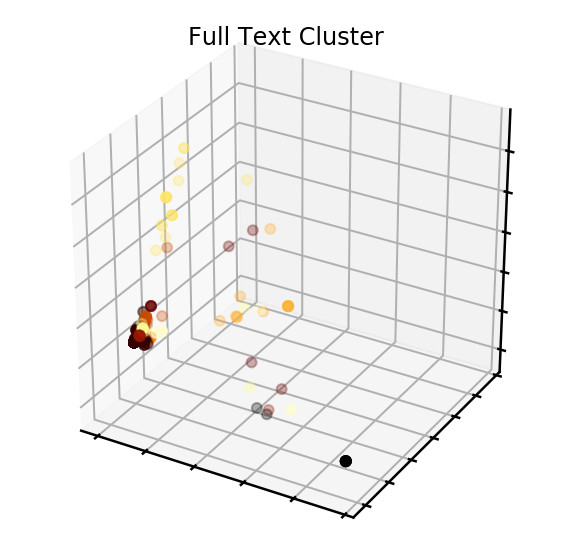

In [56]:
plot_sample = np.random.choice(len(X2), replace=False, size=500)
plot_vectors(X2[plot_sample], labels=km.labels_[plot_sample]) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

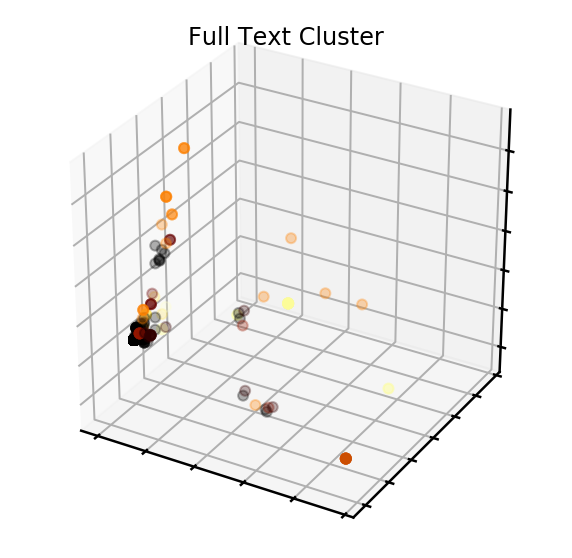

In [57]:
plot_vectors(X2[sample[:500]], labels=agg_sample[:500])

### LDA Visiualization

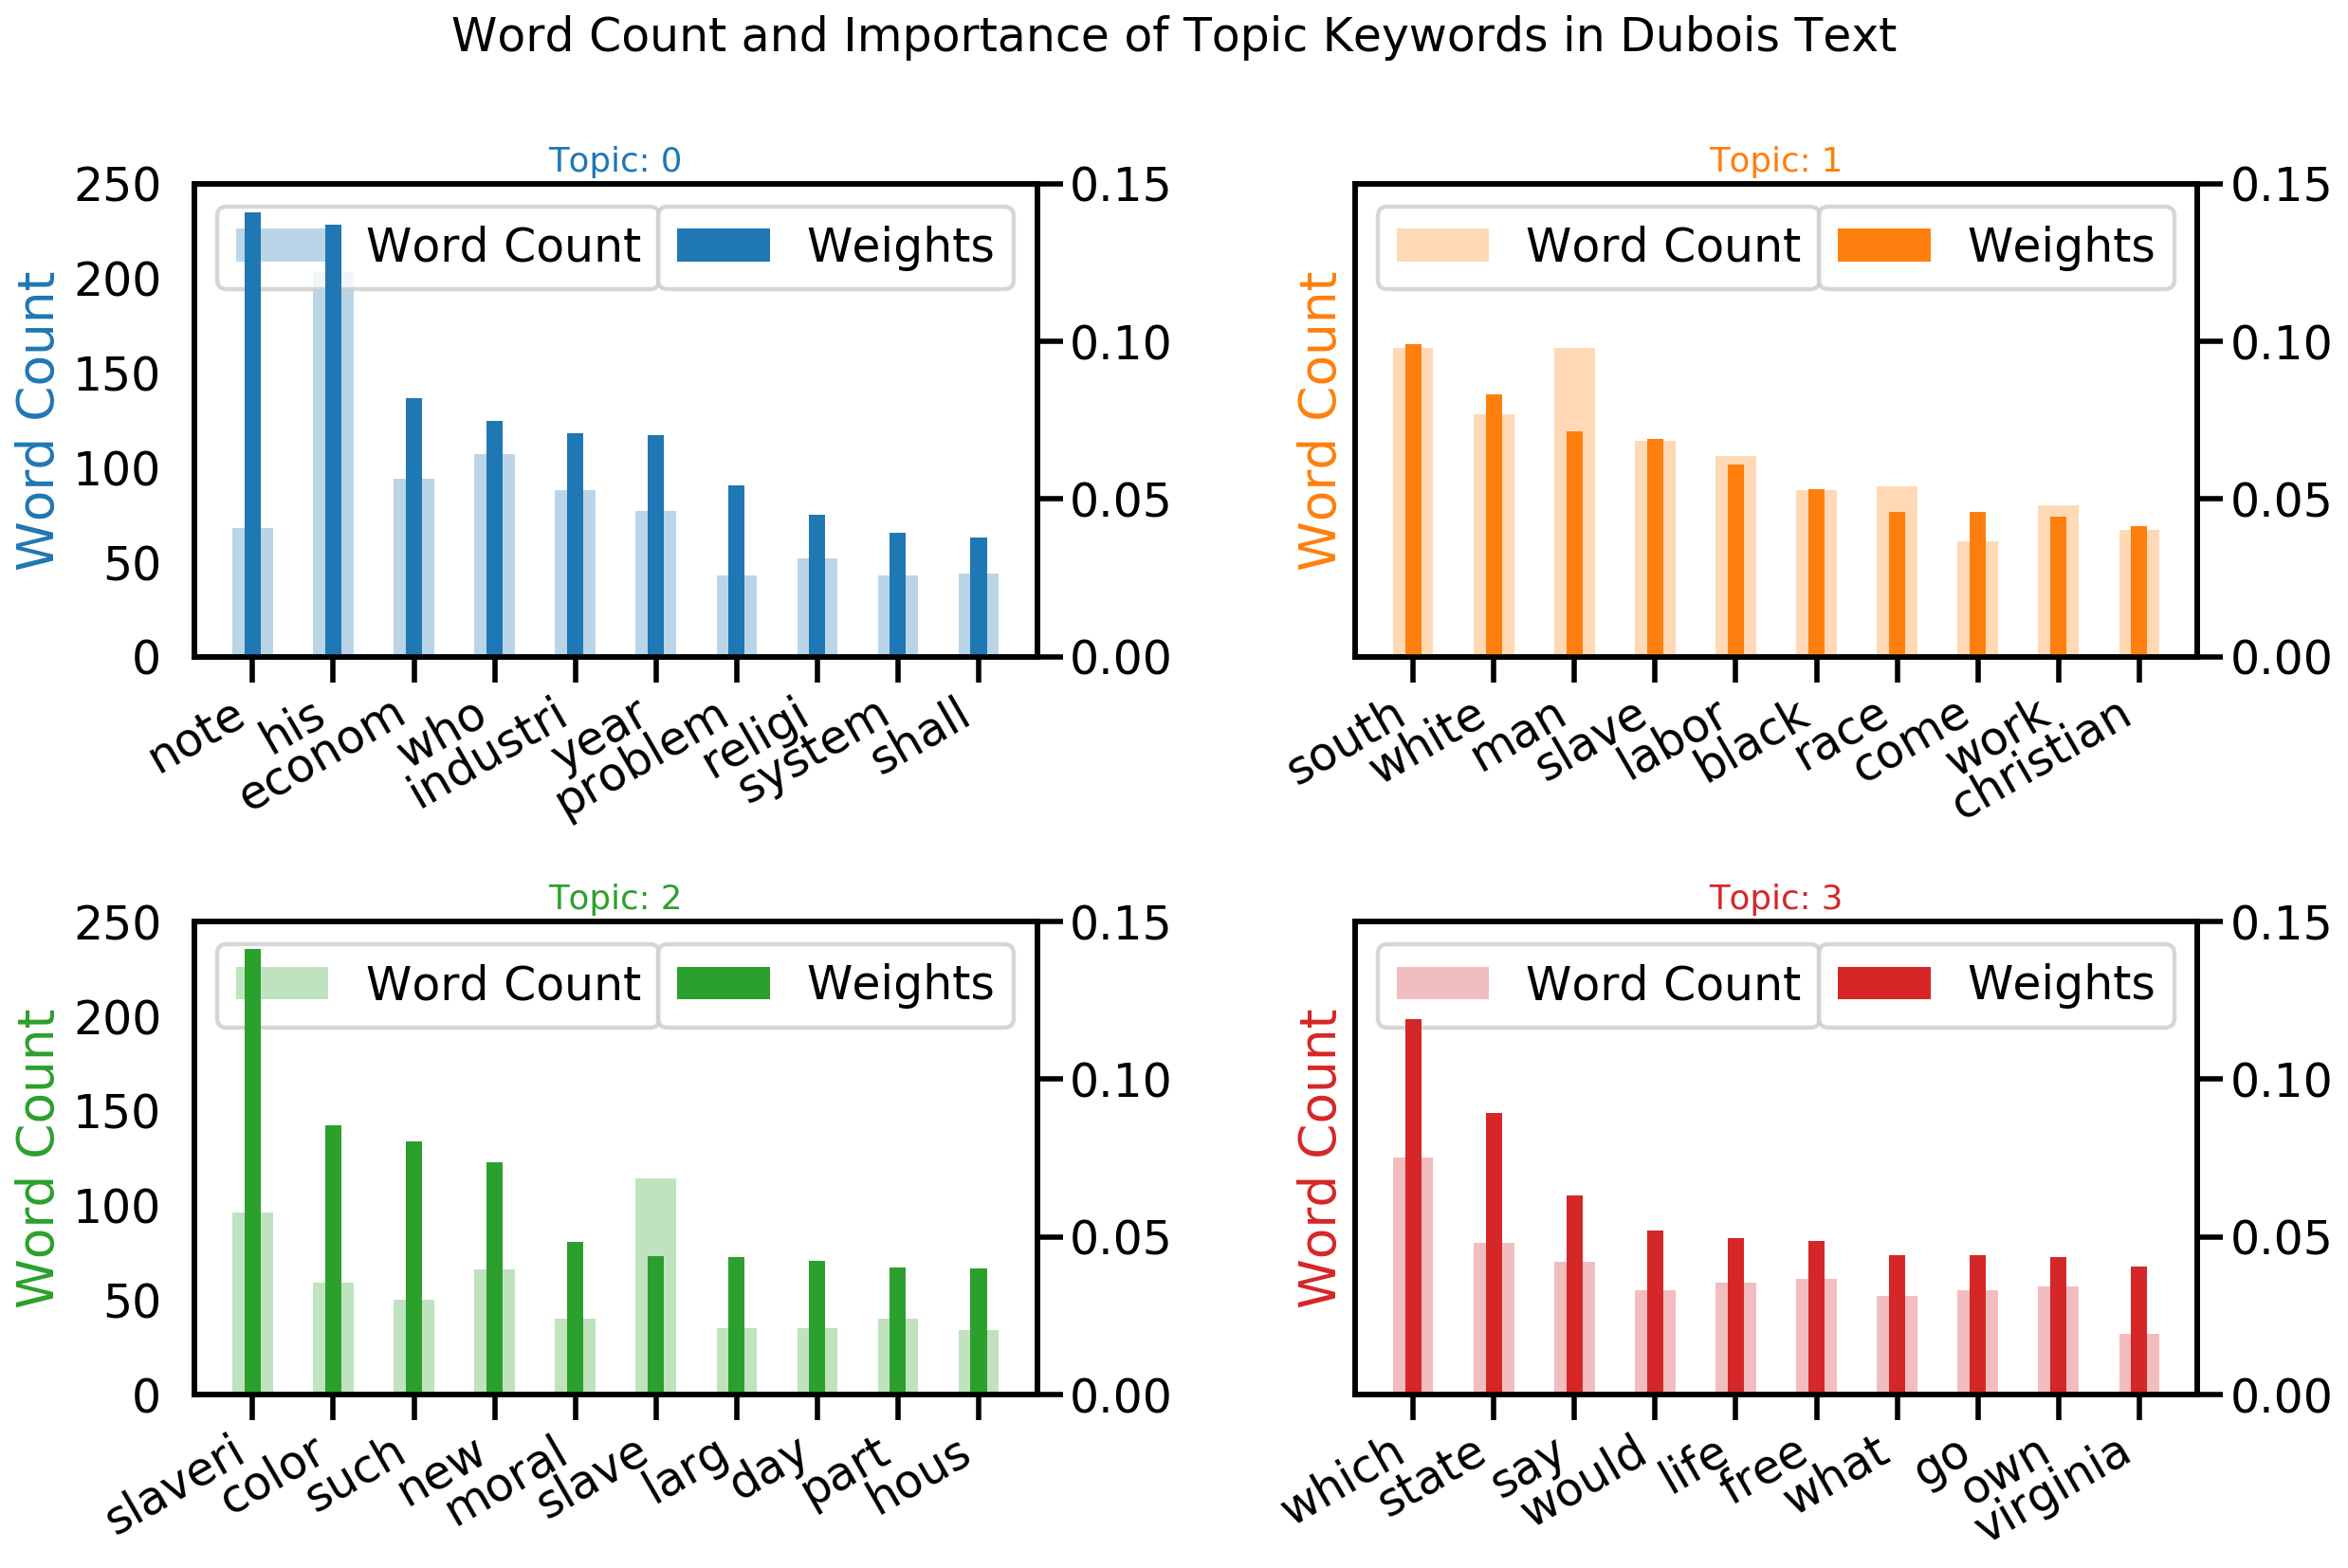

In [58]:
topics = duboismodel.show_topics(formatted=False)
data_flat = [w for w_list in duboisstems for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.15); ax.set_ylim(0, 250)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords in Dubois Text', fontsize=22, y=1.05)    
plt.show()

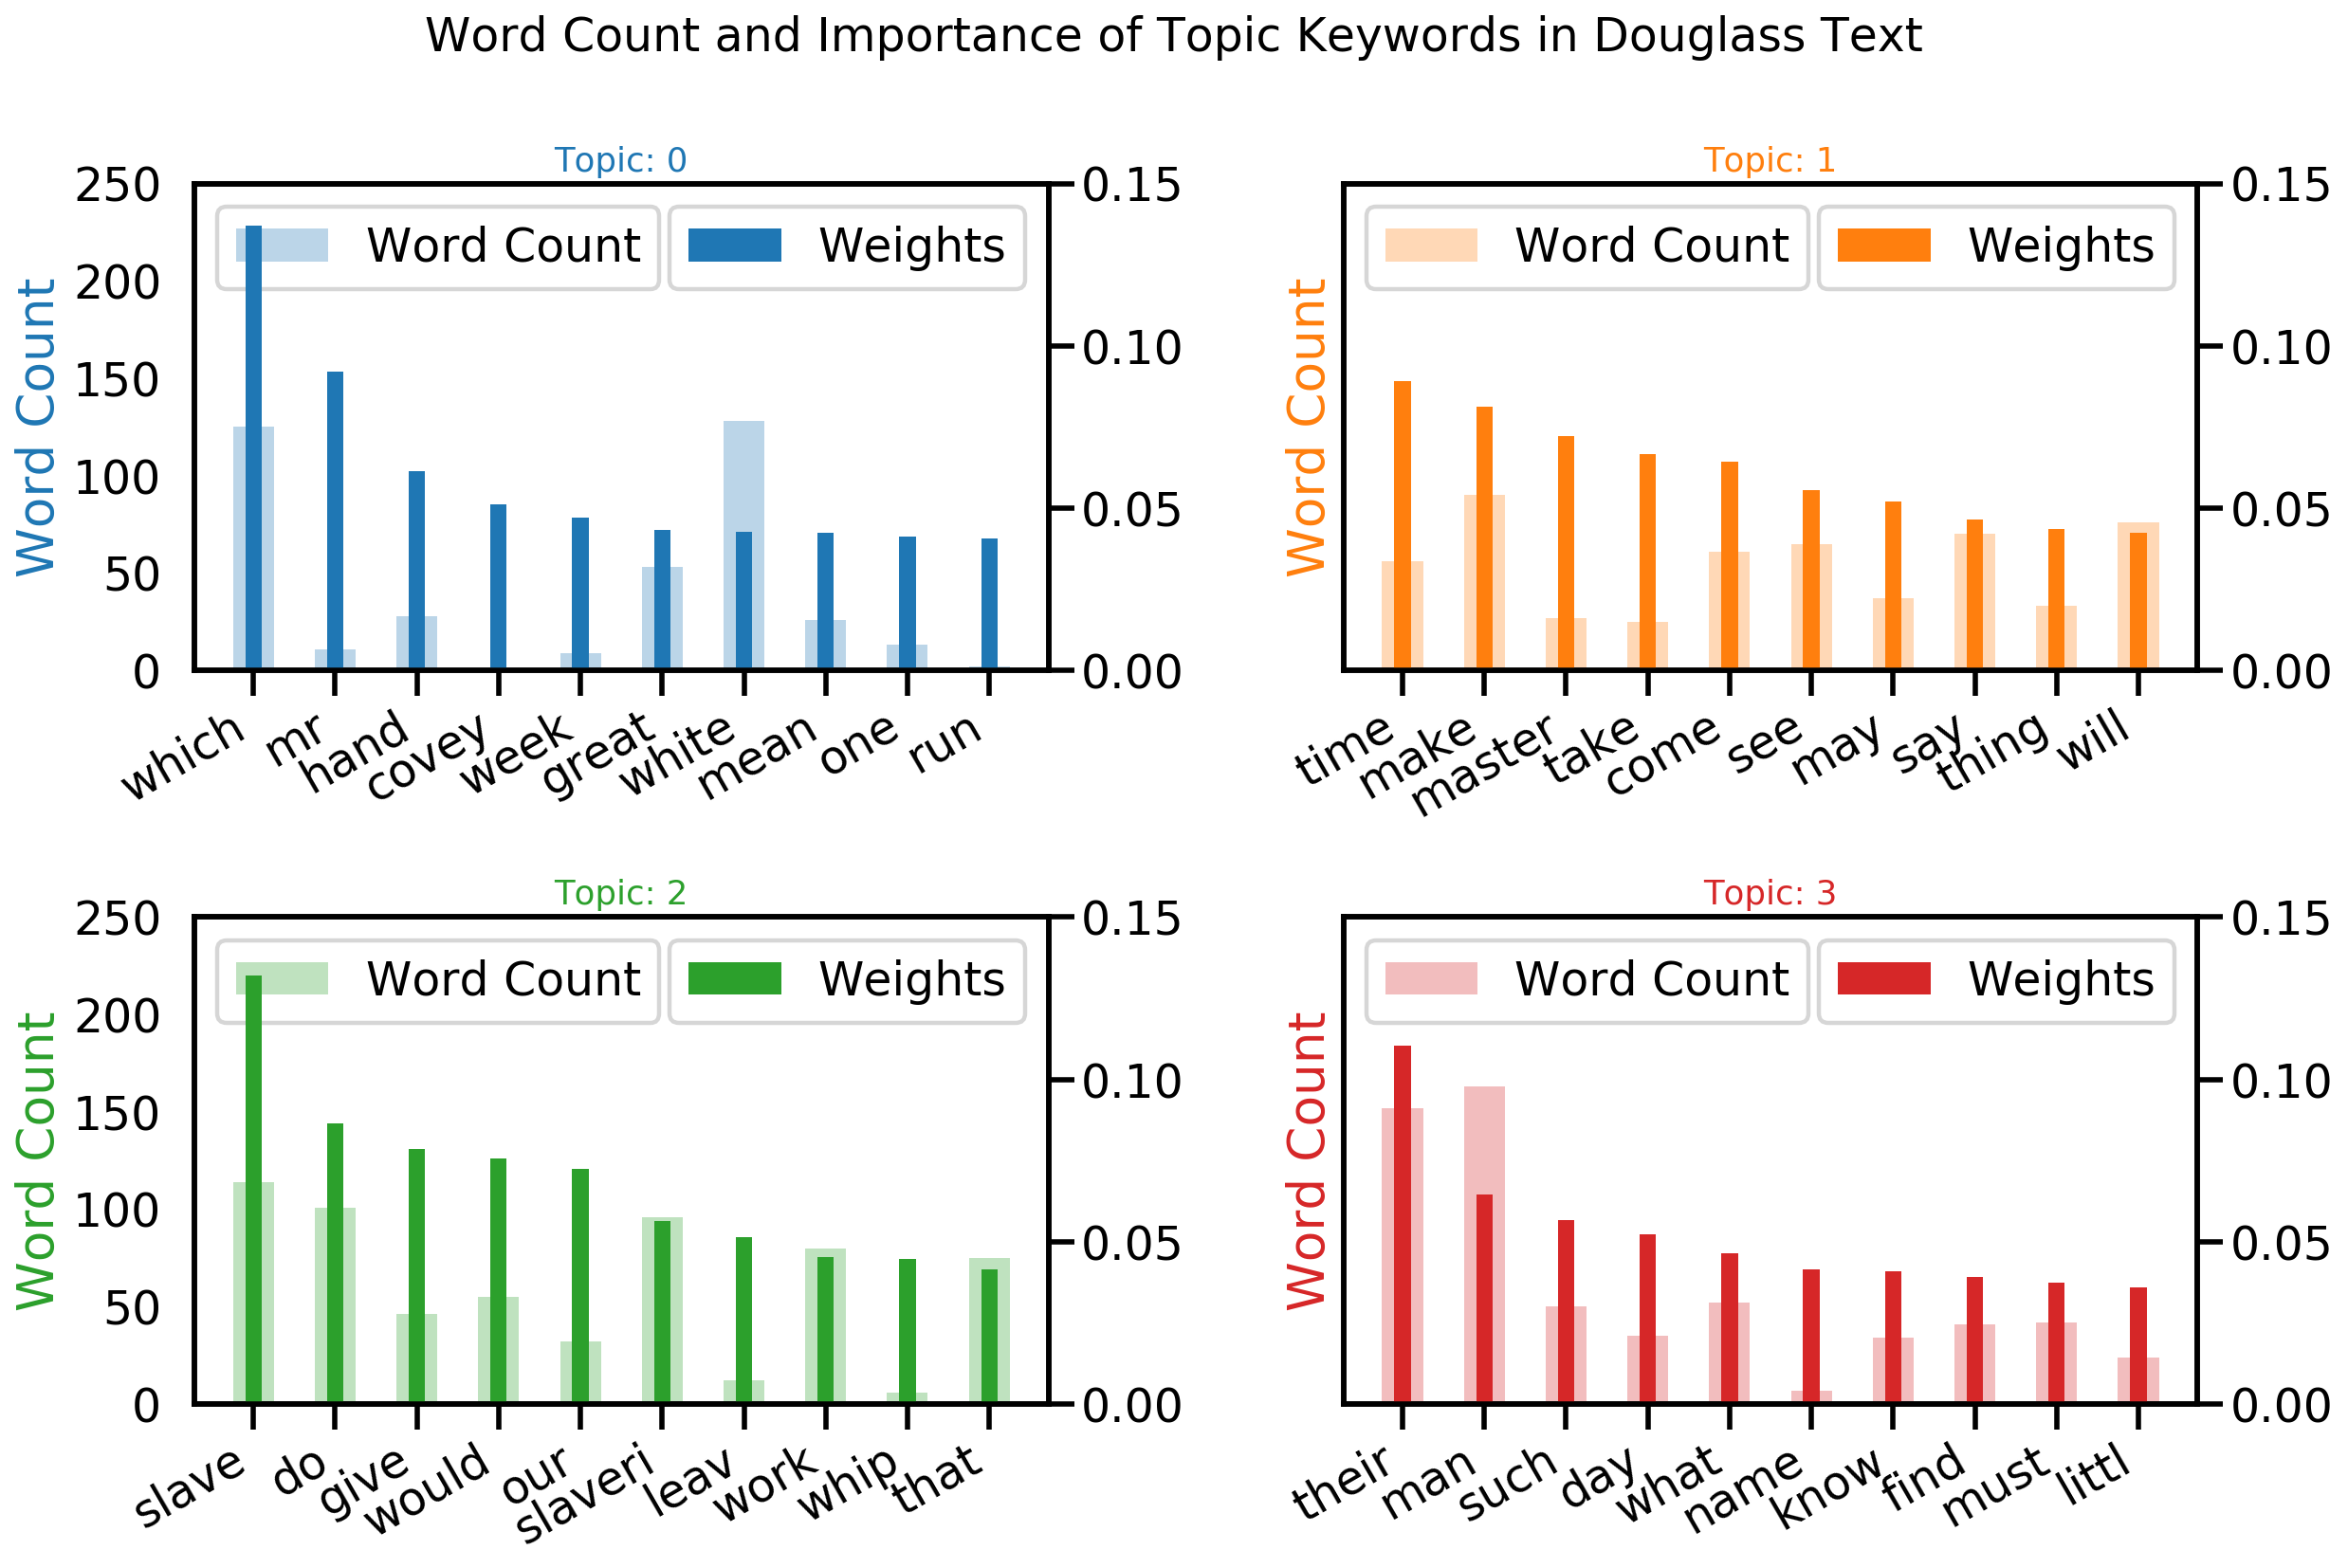

In [59]:
topics2 = douglassmodel.show_topics(formatted=False)
data_flat2 = [w for w_list in douglassstems for w in w_list]
counter2 = Counter(data_flat)

out = []
for i, topic in topics2:
    for word, weight in topic:
        out.append([word, i , weight, counter2[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.15); ax.set_ylim(0, 250)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords in Douglass Text', fontsize=22, y=1.05)    
plt.show()

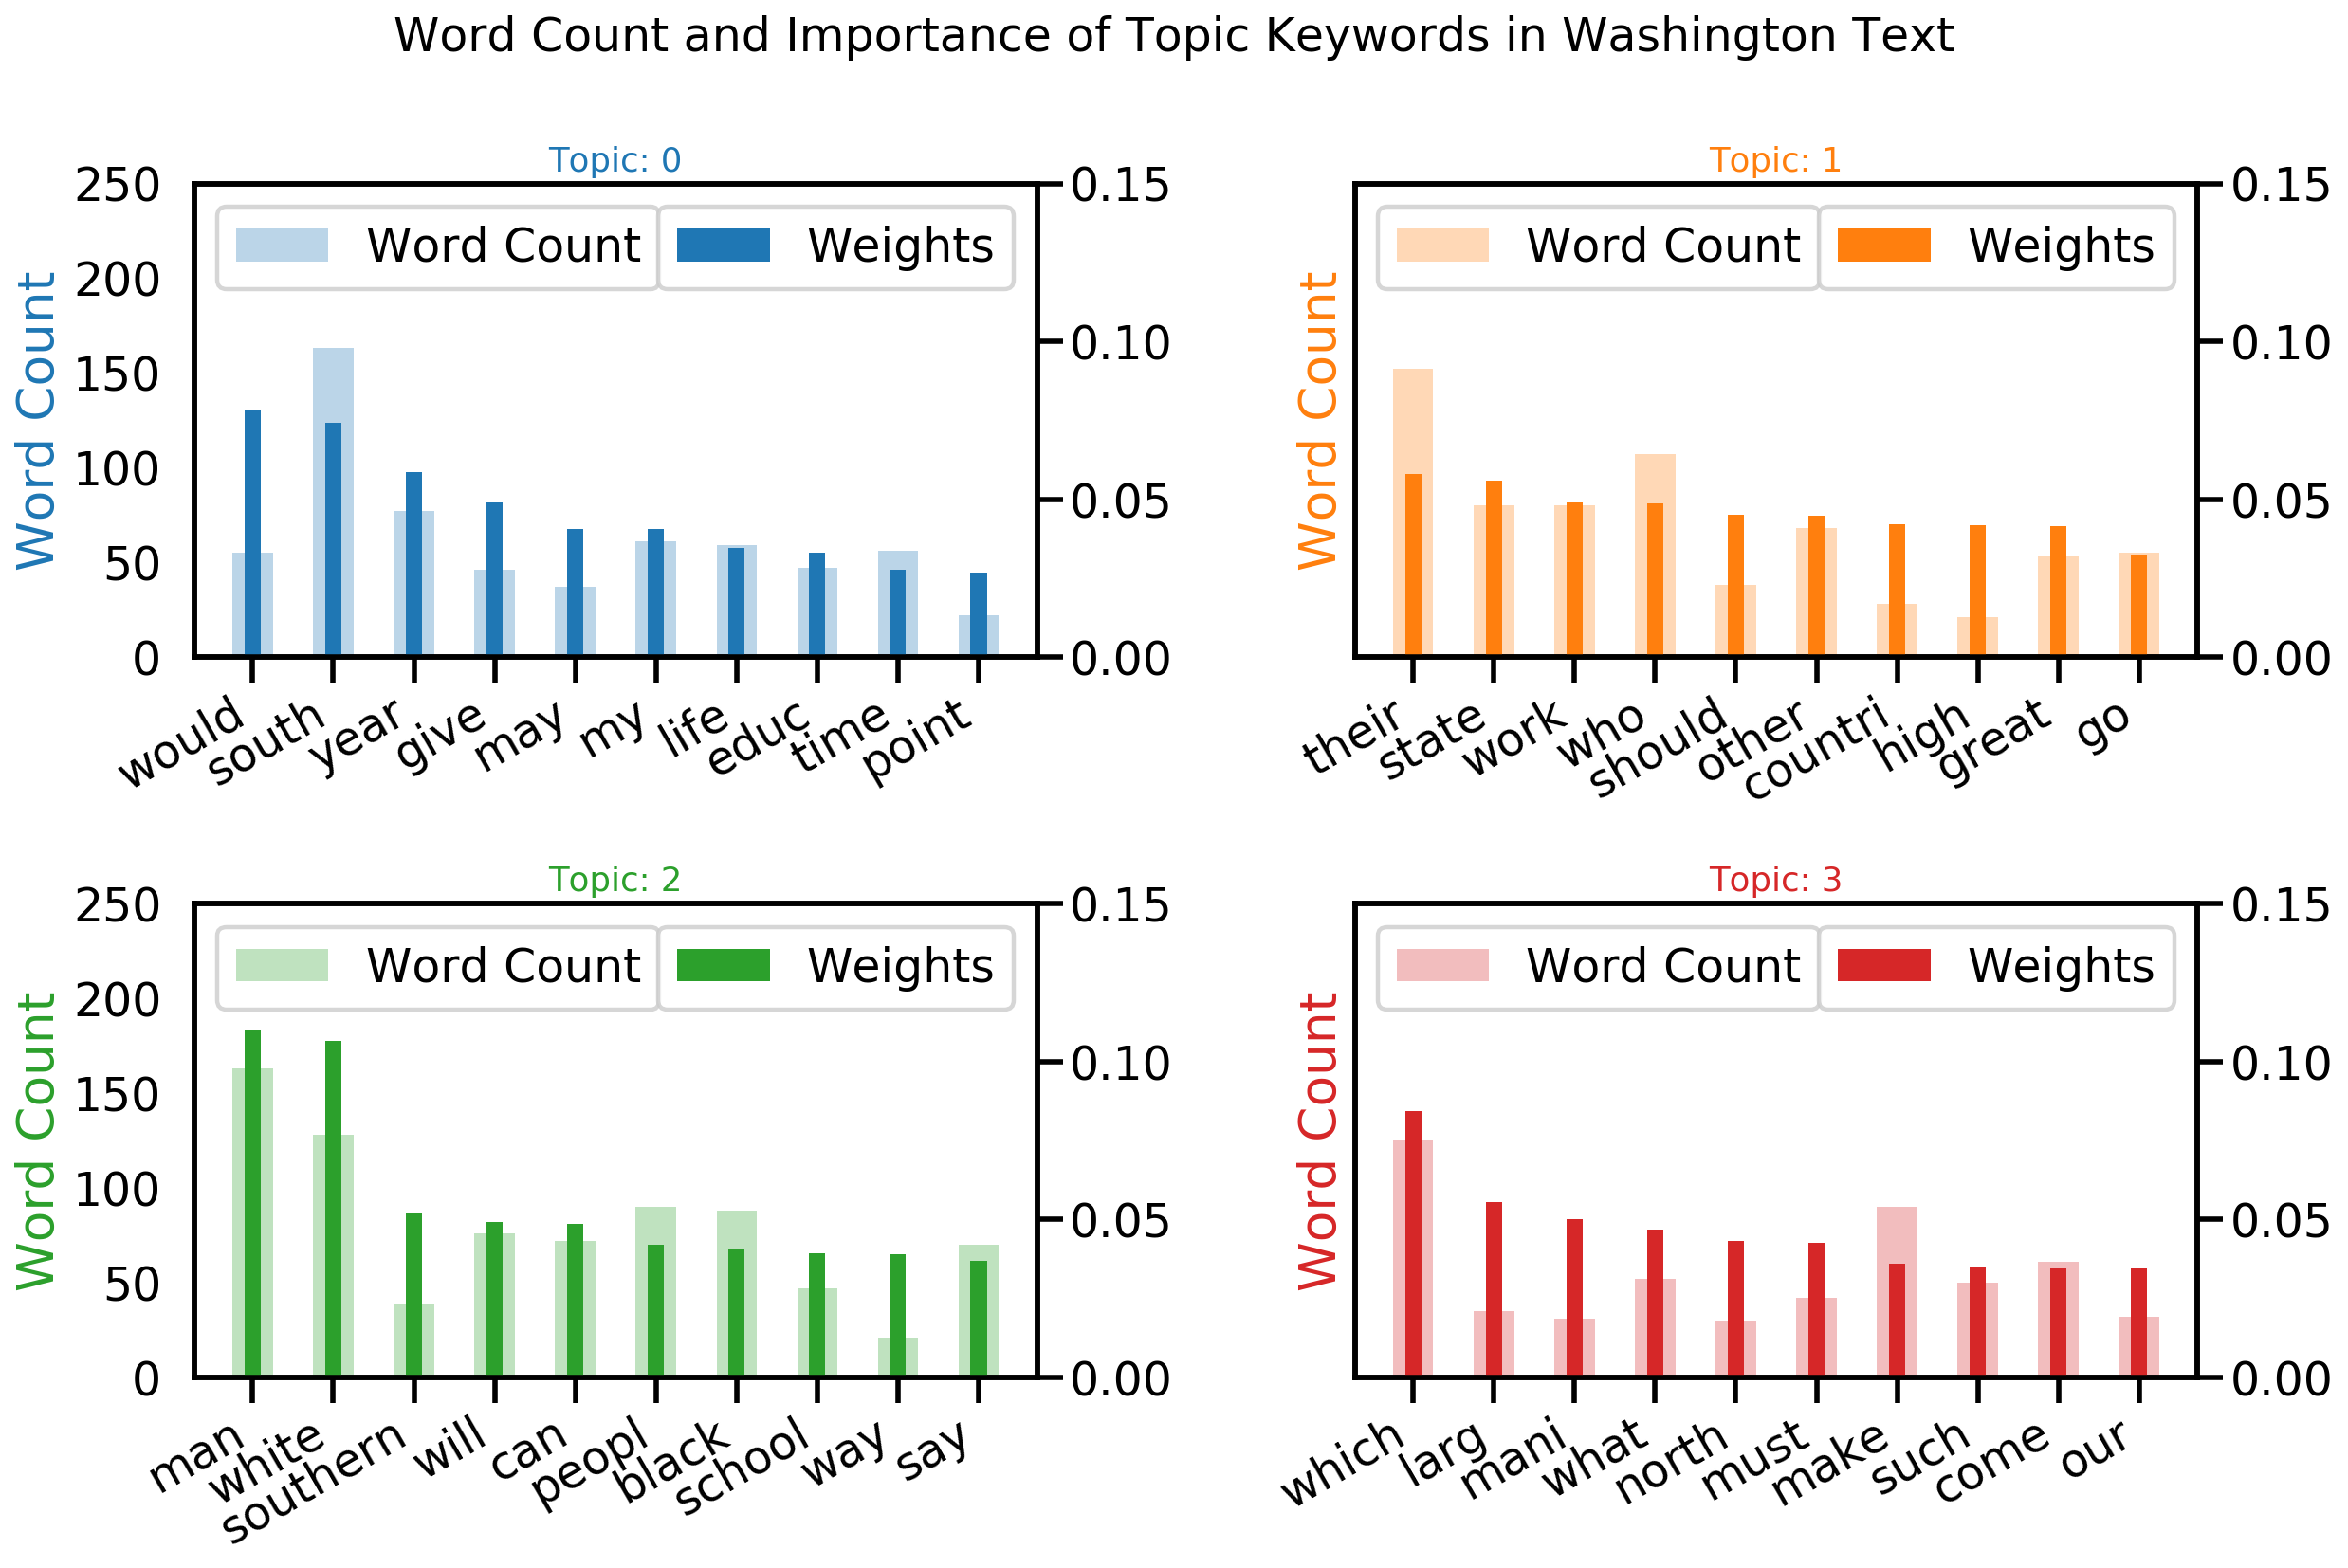

In [60]:
topics3 = washingtonmodel.show_topics(formatted=False)
data_flat3 = [w for w_list in washingtonstems for w in w_list]
counter3 = Counter(data_flat)

out = []
for i, topic in topics3:
    for word, weight in topic:
        out.append([word, i , weight, counter3[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.15); ax.set_ylim(0, 250)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords in Washington Text', fontsize=22, y=1.05)    
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


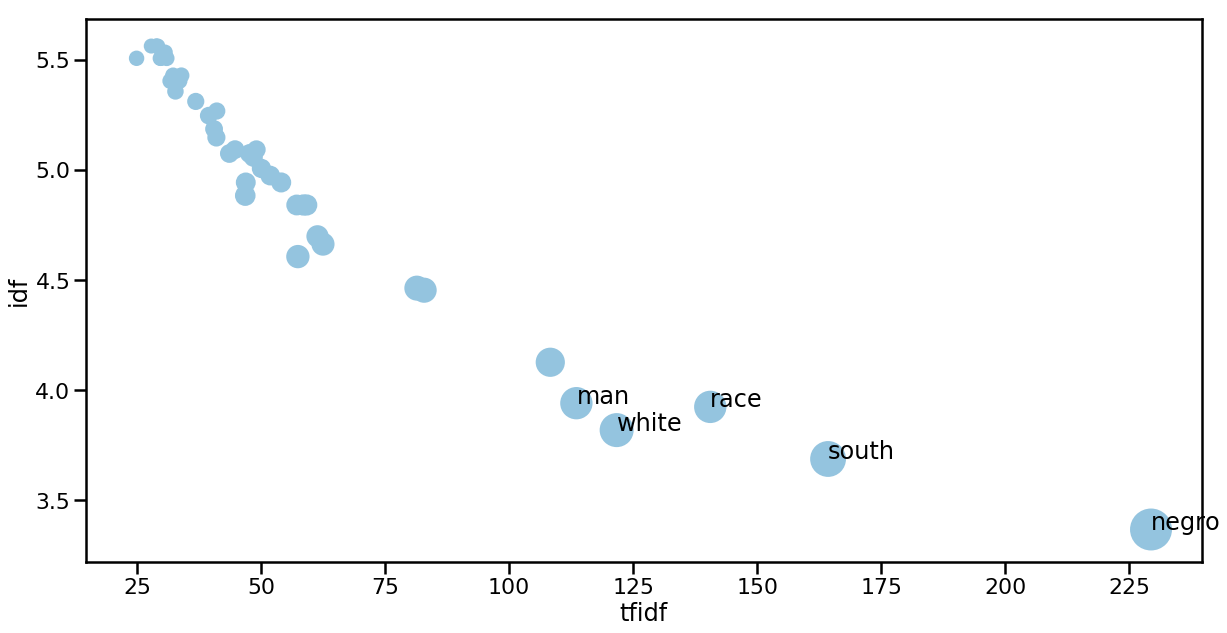

In [61]:
fig, ax = plt.subplots(figsize=(20,10))
a = plt.scatter(df3.tfidf,df3.idf,s=df3['tf']*5, c = plt.cm.Blues(0.4))

plt.xlabel('tfidf')
plt.ylabel('idf')


for i,txt in enumerate(df3.word[0:5]):
    ax.annotate(txt, (df3.tfidf.iat[i],df3.idf.iat[i]))